## Flight Price Prediction EDA

#### Source : https://github.com/krishnaik06/5-Days-Live-EDA-and-Feature-Engineering/tree/main/Flight%20Prediction

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_df=pd.read_excel("./datasets/flight_train.xlsx")

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_df.shape

(10683, 11)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_df["Additional_Info"].unique

<bound method Series.unique of 0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10683, dtype: object>

In [7]:
test_df=pd.read_excel("./datasets/flight_test.xlsx")

In [8]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [9]:
test_df.shape

(2671, 10)

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [11]:
test_df["Additional_Info"].unique

<bound method Series.unique of 0                           No info
1                           No info
2       In-flight meal not included
3                           No info
4                           No info
                   ...             
2666                        No info
2667                        No info
2668                        No info
2669                        No info
2670                        No info
Name: Additional_Info, Length: 2671, dtype: object>

In [12]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [15]:
df.shape

(13354, 11)

In [16]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

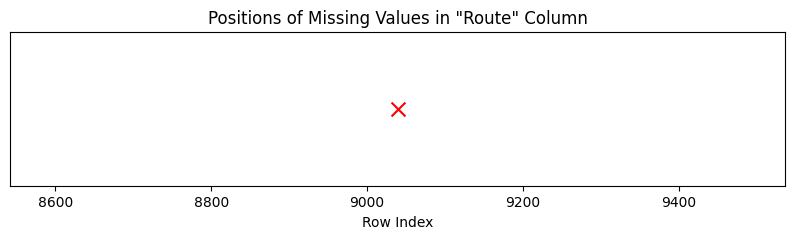

In [17]:
# Create a DataFrame for plotting the missing value positions
missing_positions = df[df['Route'].isnull()].index
plt.figure(figsize=(10, 2))
plt.scatter(missing_positions, np.zeros(len(missing_positions)), color='red', marker='x', s=100)
plt.yticks([]) 
plt.xlabel('Row Index')
plt.title('Positions of Missing Values in "Route" Column')
plt.show()

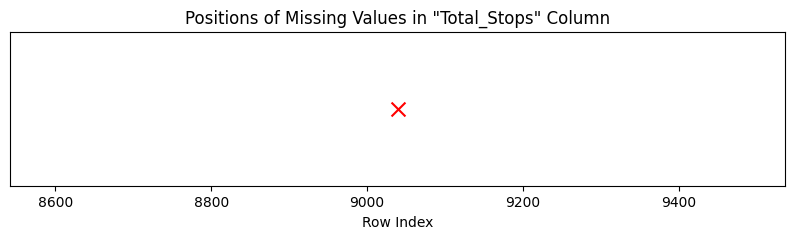

In [18]:
missing_positions = df[df['Total_Stops'].isnull()].index
plt.figure(figsize=(10, 2))
plt.scatter(missing_positions, np.zeros(len(missing_positions)), color='red', marker='x', s=100)
plt.yticks([]) 
plt.xlabel('Row Index')
plt.title('Positions of Missing Values in "Total_Stops" Column')
plt.show()

### Feature Engineering

### Date 

In [19]:
df['Date']=df['Date_of_Journey'].str.split("/").str[0]
df['Month']=df['Date_of_Journey'].str.split("/").str[1]
df['Year']=df['Date_of_Journey'].str.split("/").str[2]


# df["Date"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
# df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
# df["Year"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[2])


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.4+ MB


In [21]:
# Date, Month & Year are still in object datatype so we convert into integer
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.3+ MB


In [23]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019


In [24]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [25]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019


### Arrival time

In [26]:
df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
13349    20:25
13350    16:55
13351    04:25
13352    19:15
13353    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [27]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [28]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [29]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10


In [30]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.3+ MB


In [32]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [33]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15


### Departure time

In [34]:
df['Dep_Time'].str.split(' ').str[0]

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
13349    20:30
13350    14:20
13351    21:50
13352    04:00
13353    04:55
Name: Dep_Time, Length: 13354, dtype: object

In [35]:
df['Dep_Time']=df['Dep_Time'].apply(lambda x : x.split(' ')[0])

In [36]:
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_min']=df['Dep_Time'].str.split(':').str[1]

In [37]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [38]:
df['Dep_hour']=df['Dep_hour'].astype(int)
df['Dep_min']=df['Dep_min'].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Arrival_hour     13354 non-null  int32  
 13  Arrival_min      13354 non-null  int32  
 14  Dep_hour         13354 non-null  int32  
 15  Dep_min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(8)
memory usage: 1.3+ MB


In [40]:
df.drop('Dep_Time',axis=1,inplace=True)

In [41]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


### Duration 

In [42]:
def parse_duration(duration):
    hours = 0
    minutes = 0
    if 'h' in duration:
        parts = duration.split('h')
        hours = int(parts[0].strip())
        if 'm' in parts[1]:
            minutes = int(parts[1].replace('m', '').strip())
    elif 'm' in duration:
        minutes = int(duration.replace('m', '').strip())
    return hours, minutes

# Create the new 'duration_hour' and 'duration_min' columns
df[['Duration_hour', 'Duration_min']] = df['Duration'].apply(
    lambda x: pd.Series(parse_duration(x))
)

In [43]:
# Convert the new columns to integer type
df['Duration_hour'] = df['Duration_hour'].astype(int)
df['Duration_min'] = df['Duration_min'].astype(int)

In [44]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20,2,50


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dep_hour         13354 non-null  int32  
 14  Dep_min          13354 non-null  int32  
 15  Duration_hour    13354 non-null  int32  
 16  Duration_min     13354 non-null  int32  
dtypes: float64(1

In [46]:
df.drop("Duration",axis=1,inplace=True)

In [47]:
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,2019,1,10,22,20,2,50


### Missing Values

In [48]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
Duration_hour         0
Duration_min          0
dtype: int64

In [49]:
df.drop("Route",axis=1,inplace=True)

In [50]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,24,3,2019,1,10,22,20,2,50


In [51]:
df[df["Total_Stops"].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
9039,Air India,Delhi,Cochin,NaN,No info,7480.0,6,5,2019,9,25,9,45,23,40


In [52]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [53]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [54]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [55]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [56]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [57]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [58]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [59]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [60]:
df['Airline']=labelencoder.fit_transform(df['Airline'])
df['Source']=labelencoder.fit_transform(df['Source'])
df['Destination']=labelencoder.fit_transform(df['Destination'])
df['Additional_Info']=labelencoder.fit_transform(df['Additional_Info'])

In [61]:
df.shape

(13354, 15)

In [62]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,50
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,25


In [63]:
df[['Airline']]

,Airline
0,3
1,1
2,4
3,3
4,3
...,...
13349,1
13350,3
13351,4
13352,1


In [64]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [66]:
ohe.fit_transform(np.array(df['Airline']).reshape(-1,1))

<13354x12 sparse matrix of type '<class 'numpy.float64'>'
	with 13354 stored elements in Compressed Sparse Row format>

In [67]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2,50
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7,25
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19,0
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5,25
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4,45


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  int32  
 1   Source           13354 non-null  int32  
 2   Destination      13354 non-null  int32  
 3   Total_Stops      13353 non-null  float64
 4   Additional_Info  13354 non-null  int32  
 5   Price            10683 non-null  float64
 6   Date             13354 non-null  int32  
 7   Month            13354 non-null  int32  
 8   Year             13354 non-null  int32  
 9   Arrival_hour     13354 non-null  int32  
 10  Arrival_min      13354 non-null  int32  
 11  Dep_hour         13354 non-null  int32  
 12  Dep_min          13354 non-null  int32  
 13  Duration_hour    13354 non-null  int32  
 14  Duration_min     13354 non-null  int32  
dtypes: float64(2), int32(13)
memory usage: 886.9 KB


In [72]:
pd.get_dummies(df["Airline"])

,0,1,2,3,4,5,6,7,8,9,10,11
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,False,True,False,False,False,False,False,False,False,False,False,False
13350,False,False,False,True,False,False,False,False,False,False,False,False
13351,False,False,False,False,True,False,False,False,False,False,False,False
13352,False,True,False,False,False,False,False,False,False,False,False,False


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  int32  
 1   Source           13354 non-null  int32  
 2   Destination      13354 non-null  int32  
 3   Total_Stops      13353 non-null  float64
 4   Additional_Info  13354 non-null  int32  
 5   Price            10683 non-null  float64
 6   Date             13354 non-null  int32  
 7   Month            13354 non-null  int32  
 8   Year             13354 non-null  int32  
 9   Arrival_hour     13354 non-null  int32  
 10  Arrival_min      13354 non-null  int32  
 11  Dep_hour         13354 non-null  int32  
 12  Dep_min          13354 non-null  int32  
 13  Duration_hour    13354 non-null  int32  
 14  Duration_min     13354 non-null  int32  
dtypes: float64(2), int32(13)
memory usage: 886.9 KB


### Visualization

Text(0.5, 1.0, 'Airline vs Price')

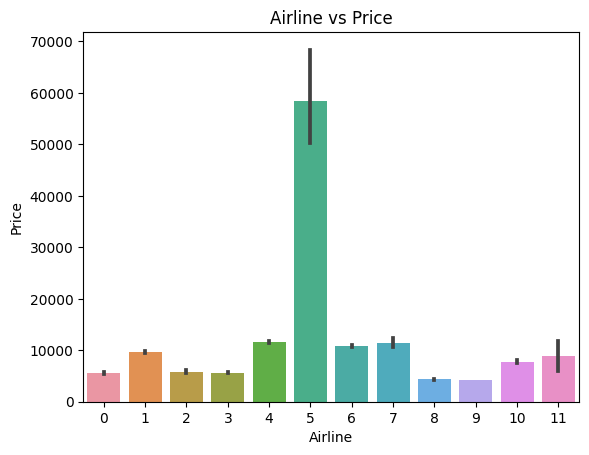

In [76]:
sns.barplot(x="Airline",y="Price",data=df)
plt.title("Airline vs Price")

Text(0.5, 1.0, 'Total Stops vs Price')

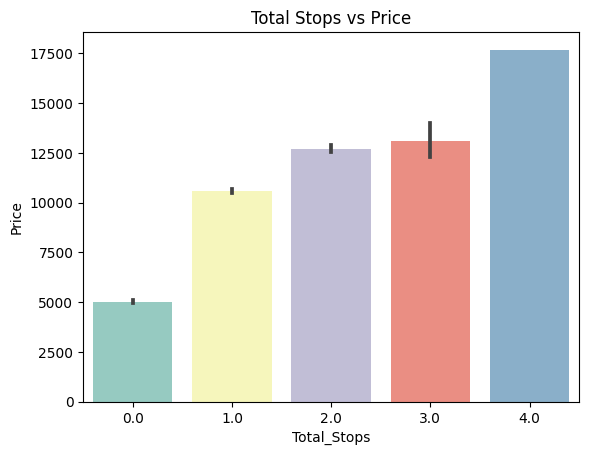

In [79]:
sns.barplot(x="Total_Stops",y="Price",data=df,palette="Set3")
plt.title("Total Stops vs Price")

Text(0.5, 1.0, 'Source vs Price')

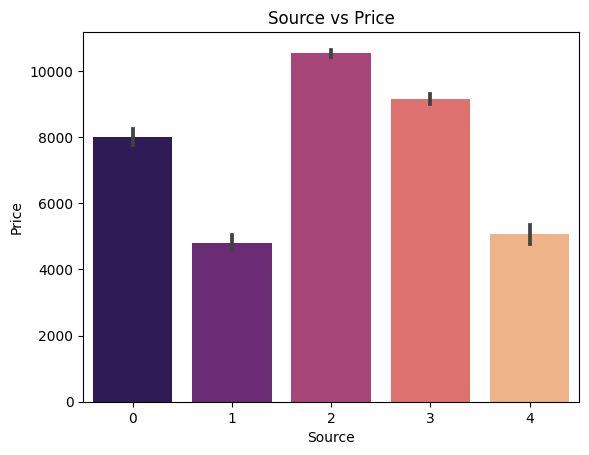

In [81]:
sns.barplot(x="Source",y="Price",data=df,palette="magma")
plt.title("Source vs Price")

Text(0.5, 1.0, 'Destination vs Price')

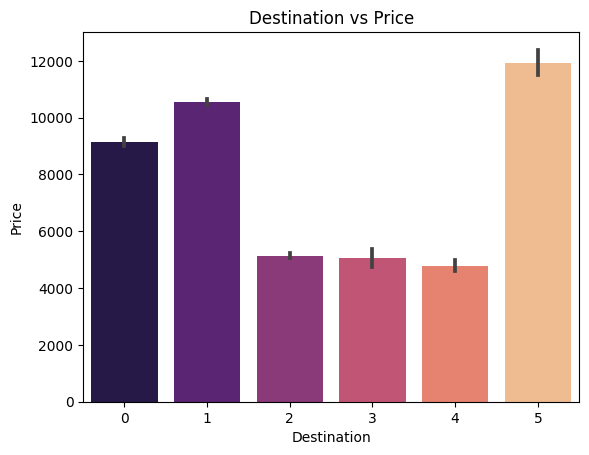

In [82]:
sns.barplot(x="Destination",y="Price",data=df,palette="magma")
plt.title("Destination vs Price")

Text(0.5, 1.0, 'Source vs Destination')

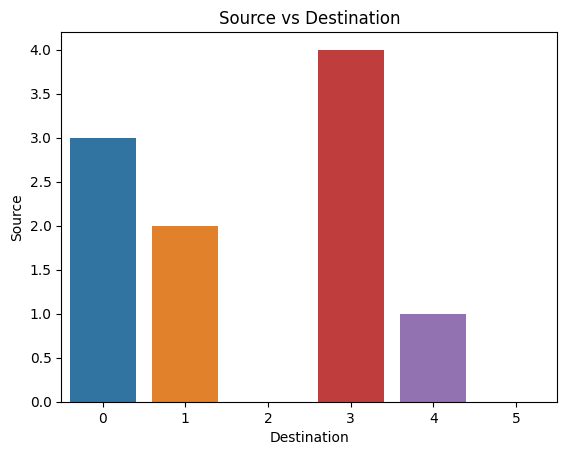

In [84]:
sns.barplot(x="Destination",y="Source",data=df)
plt.title("Source vs Destination")

Text(0.5, 1.0, ' Year vs Price')

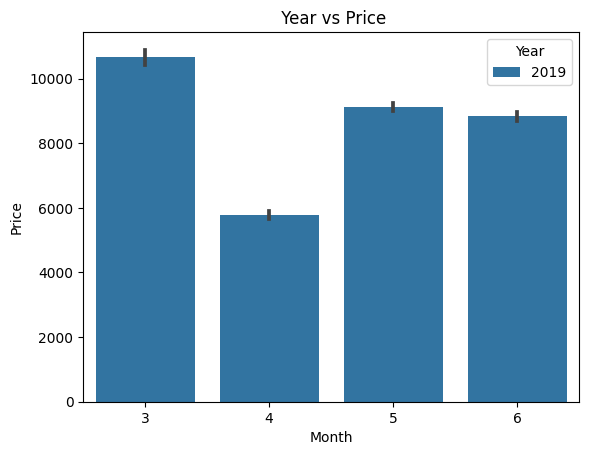

In [88]:
sns.barplot(x="Month",y="Price",hue='Year',data=df)
plt.title(" Year vs Price")